Aquesta tasca consisteix en l'elaboració d'un informe de Power BI, aprofitant les capacitats analítiques de Python. S'utilitzaran els scripts de Python creats prèviament en la Tasca 1 per a generar visualitzacions personalitzades amb les biblioteques Seaborn i Matplotlib. Aquestes visualitzacions seran integrades en l'informe de Power BI per a oferir una comprensió més profunda de la capacitat del llenguatge de programació en l'eina Power BI.

In [1]:
# Conectar con MySQL:
import pymysql
import pandas as pd

try:
    # Conexión a la base de datos usando PyMySQL
    connection = pymysql.connect(host='127.0.0.1',
                                database='company_transactions',
                                user='root',
                                password='1234')
    print("Connected to MySQL Server")

    # Crear un cursor para interactuar con la base de datos
    cursor = connection.cursor()

    # Consultar todas las tablas de la base de datos
    cursor.execute("SHOW TABLES;")
    tables = cursor.fetchall()

    # Iterar sobre cada tabla y crear un DataFrame con el mismo nombre
    for tabla in tables:
        table_name = tabla[0]
        query = f"SELECT * FROM {table_name};"
        # Usar pandas para leer los datos y crear el DataFrame
        df = pd.read_sql(query, connection)
        # Crear una variable global con el nombre de la tabla
        globals()[table_name] = df
        print(f"DataFrame '{table_name}' creado con éxito.")

except pymysql.MySQLError as e:
    print("Error while connecting to MySQL", e)
finally:
    # Cerrar la conexión
    if 'connection' in locals() and connection.open:
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server
DataFrame 'companies' creado con éxito.
DataFrame 'credit_cards' creado con éxito.
DataFrame 'credit_cards_rechazada' creado con éxito.
DataFrame 'data_users' creado con éxito.
DataFrame 'filtro_credit_cards_rechazadas' creado con éxito.
DataFrame 'products' creado con éxito.
DataFrame 'tabla_intermedia_products' creado con éxito.
DataFrame 'transactions' creado con éxito.
MySQL connection is closed


C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_26480\1476058360.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Nivell 1

- Els 7 exercicis del nivell 1 de la tasca 01

Ej: 1 Una variable numèrica.

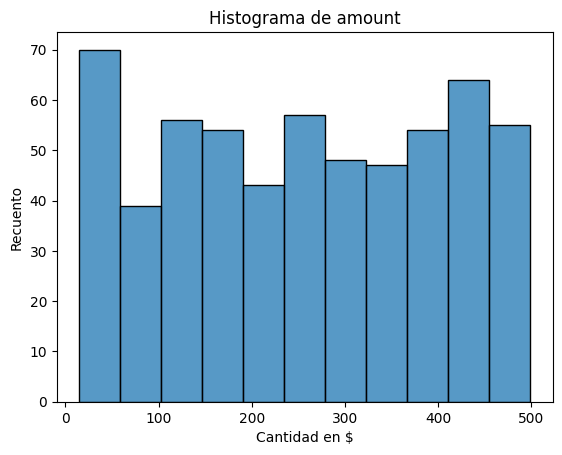

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# crear histograma
sns.histplot(data=transactions,x='amount')

# personalización gráfico:
plt.title('Histograma de amount')
plt.xlabel('Cantidad en $')
plt.ylabel('Recuento')

# muestra el gráfico:
plt.show()

Ejercicio 2: 2 variables númericas

In [4]:
# eliminar columna productos en trasaction varaible formato nulo:
#transactions.drop(columns='product_ids', inplace=True)

# primer merge:
transacciones_totales=pd.merge(transactions,tabla_intermedia_products, left_on='id', right_on='transaction_id')

#transformar variable products:
products['id']=products['id'].astype('int')

# segundo merge:
variables_num=pd.merge(transacciones_totales,products, left_on='products_id', right_on='id')

# eliminación de variables
variables_num.drop(columns=['id_x','id_y'], inplace=True)

In [5]:
variables_num['declined_2']=variables_num['declined'].replace({0:'Aceptada', 1:'Rechazada'})

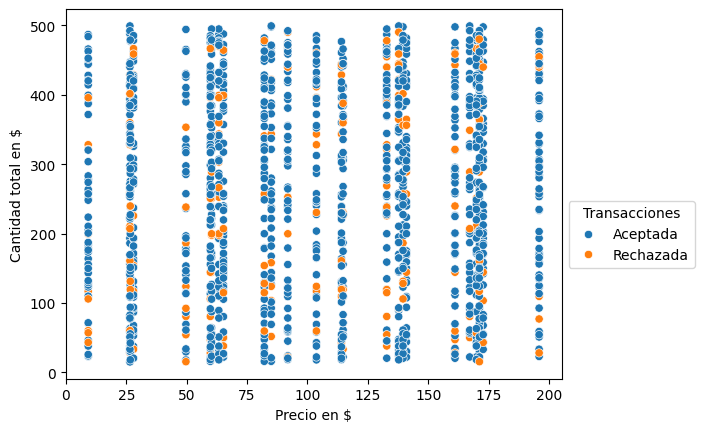

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# gráfico scatterplot en seaborn
sns.scatterplot(variables_num, x='price', y='amount', hue='declined_2')

# ajustes gráfico con matplotlyb
plt.title('')
plt.legend(title= 'Transacciones', loc='upper left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel('Precio en $')
plt.ylabel('Cantidad total en $')

# muestra gráfico
plt.show()

- Exercici 3 Una variable categòrica.

In [7]:
data_users['country']=data_users['country'].astype('string')

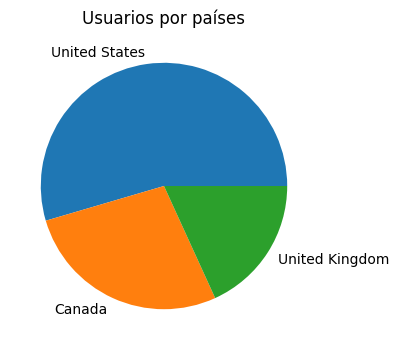

In [8]:
import pandas as pd

# gráfico:
data_users['country'].astype(str).value_counts().plot.pie(figsize=(4,4))

# personalización
plt.title('Usuarios por países')
plt.ylabel('')

# muestra gráfico
plt.show()


- Exercici 4 Una variable categòrica i una numèrica.

In [9]:
datos_ordenados=variables_num.sort_values('price',ascending=False)

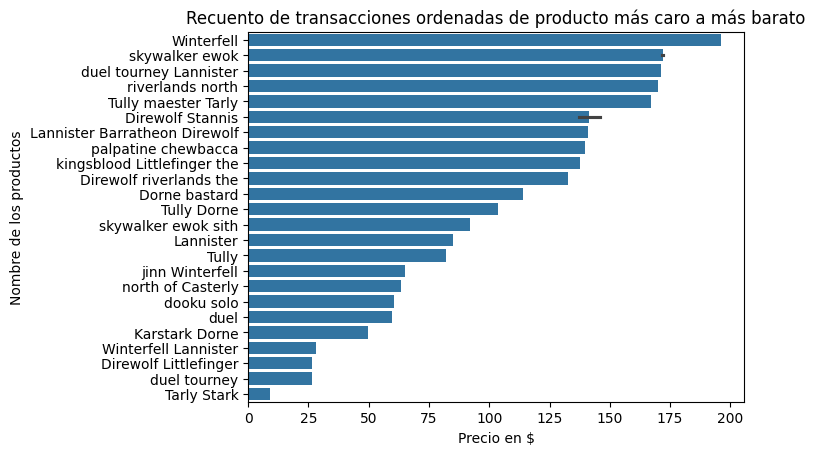

In [10]:
# creación gráfico:
sns.barplot(datos_ordenados,x='price',y='product_name')

# personalización gráfico:
plt.title('Recuento de transacciones ordenadas de producto más caro a más barato')
plt.ylabel('Nombre de los productos')
plt.xlabel('Precio en $')

# muestra gráfico: 
plt.show()

- Exercici 5 Dues variables categòriques.

In [11]:
# transformar variable declined
datos_ordenados['declined']=datos_ordenados['declined'].astype('boolean')

<Axes: ylabel='product_name'>

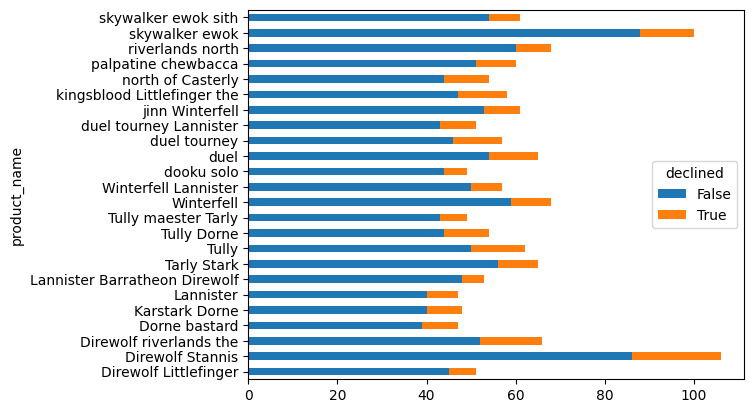

In [12]:
# Agrupar y calcular proporciones
datos_agrupados = datos_ordenados.groupby(['product_name', 'declined'])['price'].count().unstack()

datos_agrupados.plot(kind='barh', stacked=True)

- Exercici 6 Tres variables.

In [13]:
merge_1=pd.merge(variables_num,companies, left_on='business_id', right_on='company_id')
merge_1.drop(columns='business_id', inplace=True)

In [14]:
ordenados=merge_1.sort_values('amount', ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

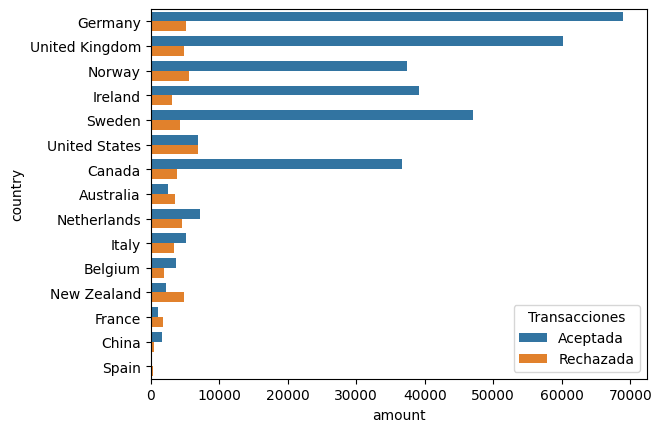

In [15]:
sns.barplot(data=ordenados, x='amount', y='country', hue='declined_2', estimator='sum', errorbar=None)

plt.legend(title='Transacciones')
plt.show

- Exercici 7 Graficar un Pairplot.

In [16]:
pair_plot=merge_1
pair_plot=pd.DataFrame(pair_plot)
pair_plot=pd.merge(pair_plot, data_users, left_on='user_id', right_on='id')

In [17]:
pair_plot.drop(columns=['user_id','id'],inplace=True)

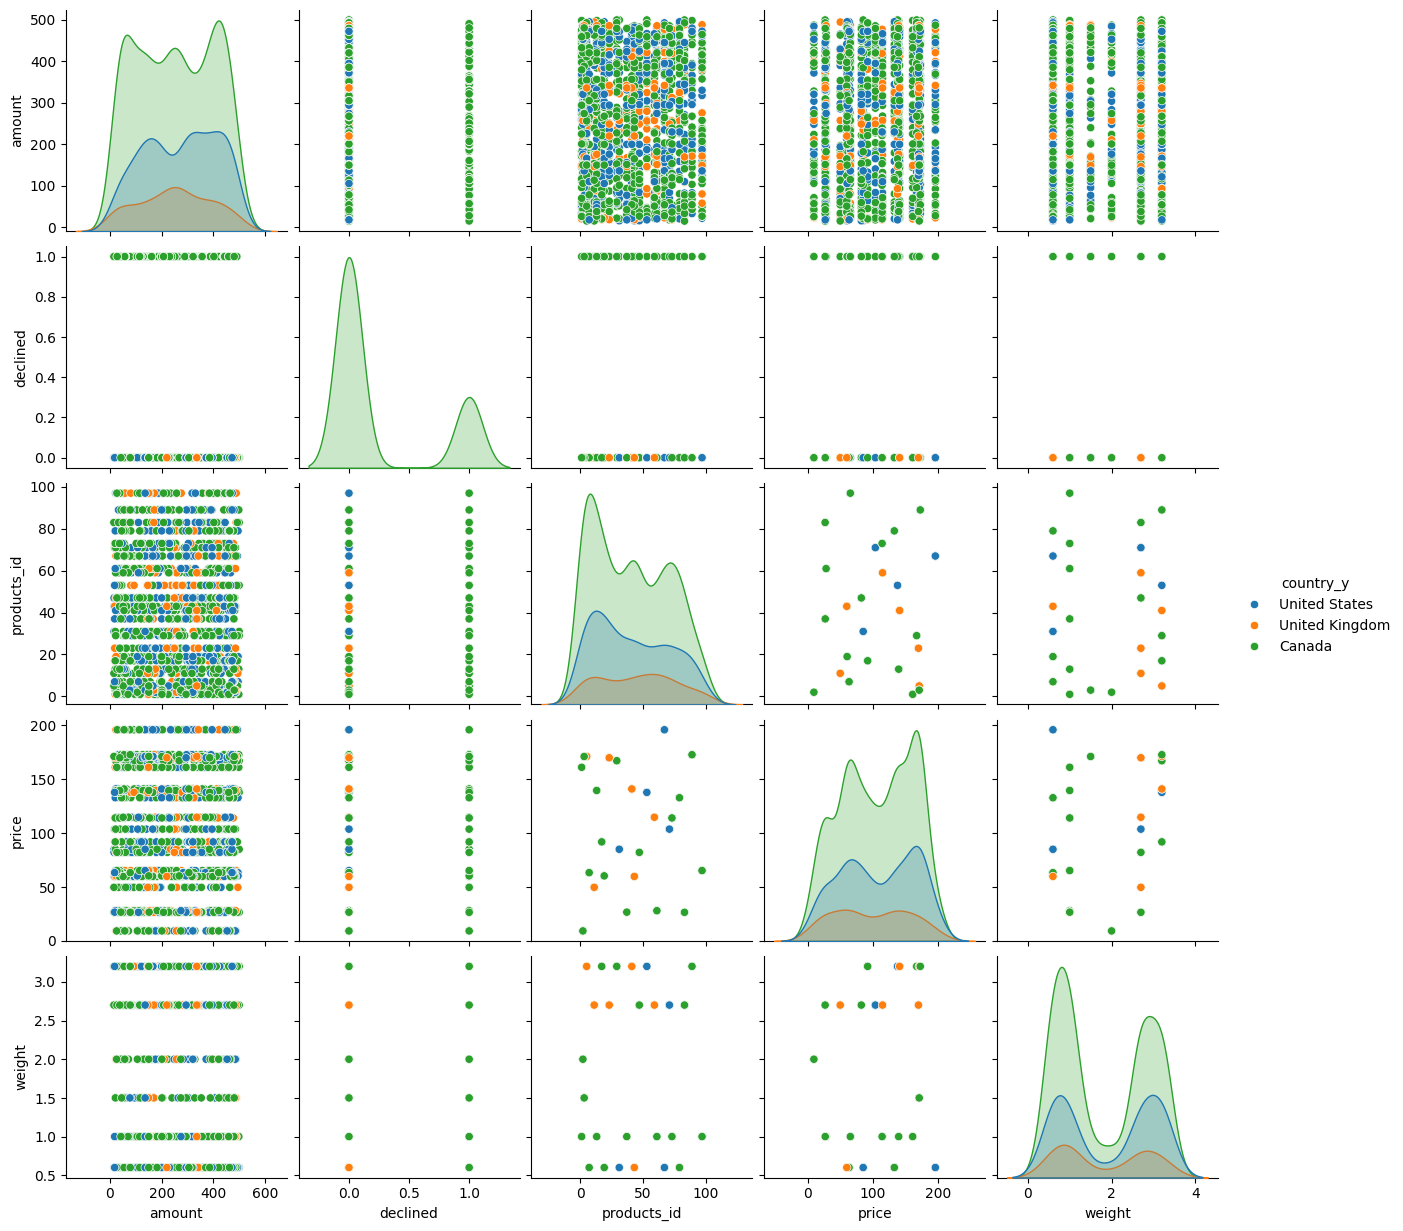

In [18]:
sns.pairplot(pair_plot, hue='country_y')

# Nivel 2

- Exercici 1 Correlació de totes les variables numèriques.

In [19]:
# filtro para buscar un caso X en todo el dataset sin conocer su variable:
buscar = 'CcU-2938'
buscar_filas= pair_plot.isin([buscar]).any(axis=1)
resultado= pair_plot[buscar_filas]
resultado.head(1)

,card_id,date,amount,declined,product_ids,lat,longitude,transaction_id,products_id,product_name,...,website,name,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address
0,CcU-2938,2021-08-28 23:42:24,466.92,0,"71, 1, 19",81.9184589824,-12.5275561984,02C6201E-D90A-1859-B4EE-88D2986D3B02,71,Tully Dorne,...,https://baidu.com/en-ca,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."


In [20]:
# filtro para coger solo las variables númericas:
filtro_num= pair_plot.select_dtypes(include='number')

# matriz de correlación:
corr = filtro_num.corr()


Text(0.5, 1.0, 'Matriz de correlación')

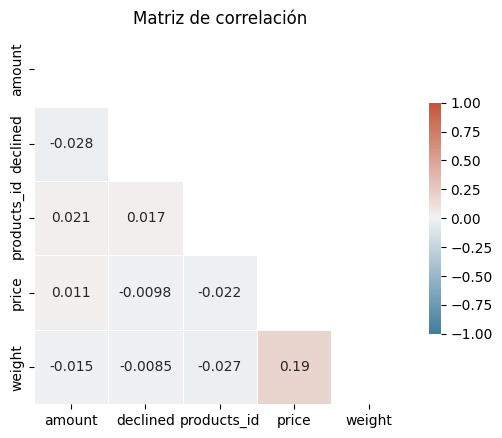

In [21]:
# genera una mascara para el triangulo de arriba
mask = np.triu(np.ones_like(corr,dtype=bool))

# matriz con matplotlib
plt.subplots(figsize=(6,6))

# generar el color map:
cmap= sns.diverging_palette(230,20, as_cmap=True)

# dibujar el gráfico:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,square=True, 
            linewidths=.5,cbar_kws={'shrink':.5}, annot=True)

# personalización
plt.title('Matriz de correlación')

               amount  declined  products_id     price    weight
amount       1.000000 -0.027897     0.021217  0.011335 -0.014904
declined    -0.027897  1.000000     0.017397 -0.009820 -0.008512
products_id  0.021217  0.017397     1.000000 -0.021742 -0.026570
price        0.011335 -0.009820    -0.021742  1.000000  0.194816
weight      -0.014904 -0.008512    -0.026570  0.194816  1.000000




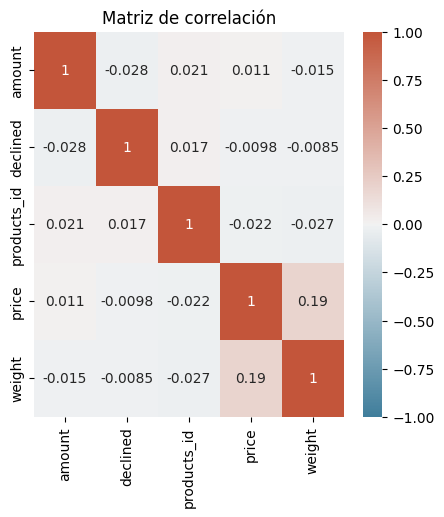

In [22]:
# coger solo variables númericas:
filtro_num = pair_plot.select_dtypes(include='number')

# calcular la correlación entre variables:
matriz_corr = filtro_num.corr()

print(matriz_corr)
print('\n')

# paleta de colores:
cmap= sns.diverging_palette(230,20, as_cmap=True)

# tamaño gráfico
plt.figure(figsize=(5,5))

# matriz de correlación
sns.heatmap(matriz_corr,annot=True,cmap=cmap,vmin=-1,vmax=1)

# personalzación gráfico:
plt.title('Matriz de correlación')
plt.show()

- Exercici 2 Implementa un jointplot.

In [23]:
# creación nueva variable distintos nombres de categorias:
pair_plot['transacciones_']=pair_plot['declined'].replace({0:'Aceptada',1:'Rechazada'})

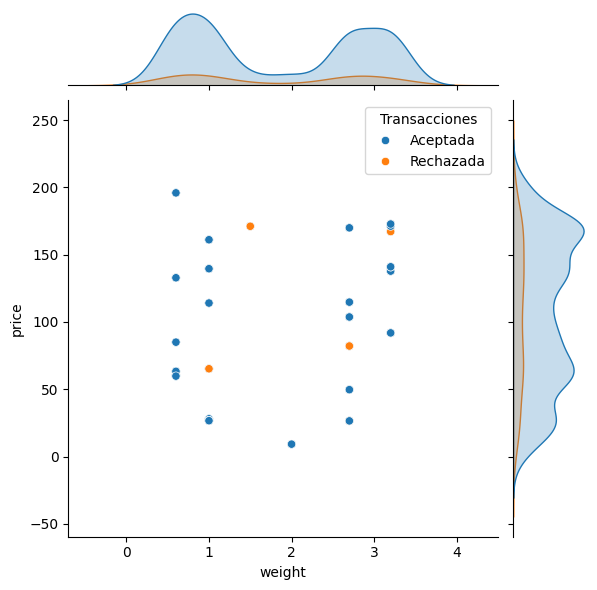

In [24]:
# creación gráfico
sns.jointplot(data=pair_plot,x='weight', y='price', hue='transacciones_')

# personalización gráfico:
plt.legend(title='Transacciones')

<Axes: xlabel='weight', ylabel='price'>

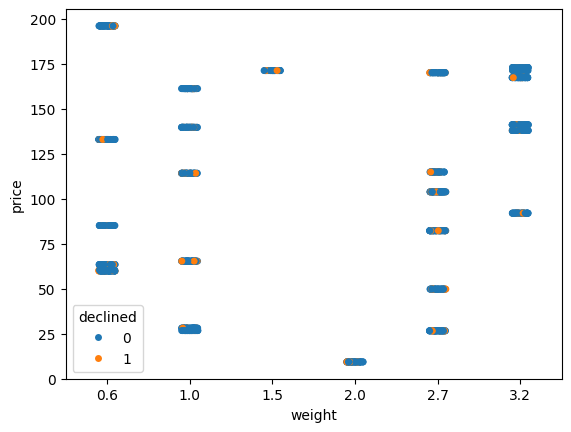

In [25]:
# gráfico para ver la cantidad de valores por cada precio solo hay 26 unicos, función jitter:
sns.stripplot(data=pair_plot,x='weight', y='price', hue='declined', jitter = True)

# Nivell 3

- Exercici 1 Implementa un violinplot combinat amb un altre tipus de gràfic.

<Axes: xlabel='weight'>

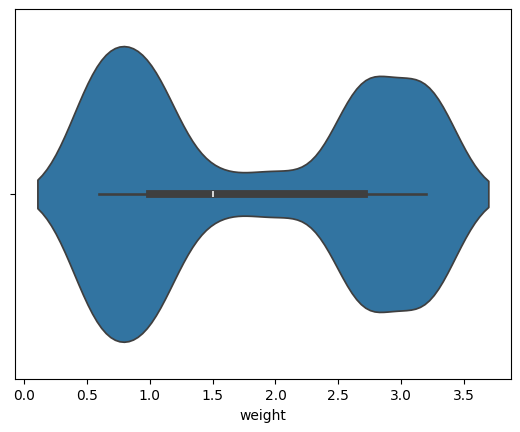

In [26]:
sns.violinplot(x=pair_plot['weight'])

- 2 Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

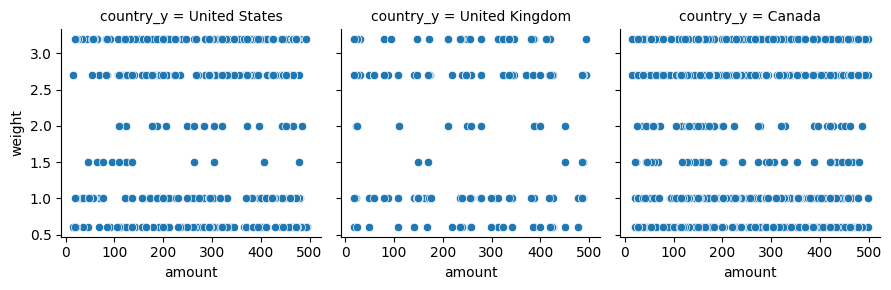

In [27]:
g=sns.FacetGrid(pair_plot, col='country_y')
g.map(sns.scatterplot,'amount','weight')